# HTTPS Brute Force detection using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of HTTPS Brute Force

Raw data from: HTTPS Brute-force [1]

-----------------------------------------------------------------------
[1] Jan Luxemburk et al. HTTPS Brute-force dataset with extended network flows, November 2020

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("../cnsm_final_datasets/https_brute_force.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,28598F178AE82C013D63BCB803ECF5076F0ADEAE3CF59A...,3,6,120,6128,1.601465e+09,1.601465e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
1,1,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,632A7854237232035C4AA219F02B6BFAD2FEDA784DA0A1...,3,4,120,2651,1.601465e+09,1.601465e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
2,2,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,6231B05C8CCDF8C359D7FBF547D458F4C4675C2298AB84...,10,11,836,6633,1.601465e+09,1.601465e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
3,3,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,1E5857055DE1CE379453DA517FB660FBFDF0277608ED6A...,4,2,1970,1360,1.601465e+09,1.601465e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
4,4,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,5E0C7366AF8F76A60B5653B5649154FB77AD59EC2F9404...,11,26,3807,25086,1.601465e+09,1.601465e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923375,923375,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,68,139,16409,144272,1.601636e+09,1.601636e+09,443,...,-2061.982151,0.006667,0.498886,0.327262,-0.1827,1.855315,0.005522,-0.070924,0.999992,True
923376,923376,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,16,23,2128,16552,1.601636e+09,1.601636e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True
923377,923377,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,16,22,2489,16500,1.601636e+09,1.601636e+09,443,...,26161.139938,0.654717,0.487634,0.278471,NaN,10.699371,8.491211,0.145225,0.698817,True
923378,923378,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,16,22,2497,16500,1.601636e+09,1.601636e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in features:
    if F in bool_features:
        continue
    if F in distribution_features:
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in frequency_features: 
        df.replace([np.inf], -1, inplace=True)
        df.replace([-np.inf], -1, inplace=True)
        df.loc[df[F].isnull(), F] = -1
    else:
        df.replace([np.inf], 0, inplace=True)
        df.replace([-np.inf], 0, inplace=True)
        df.loc[df[F].isnull(), F] = 0


for F in bool_features:
    df.loc[df[F].isnull(), F] = False
    df[F] = df[F].astype('bool')

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,28598F178AE82C013D63BCB803ECF5076F0ADEAE3CF59A...,3,6,120,6128,1.601465e+09,1.601465e+09,443,6816FA59C4FC4163C63824257C377845076EAE36F27020...,1041,1234.5,591.677277,350082,-0.275206,721.00,1520.00,94,1520,1426,1520,56.837395,478,45.917387,1173.077292,0.500000,0.500000,-0.809563,3.191774,-1.343120,1.609252e-09,2.203559e-09,0.198999,1.342036,1.792481,0.693426,0.483551,False,0.689545,0.0,0.0,0.00,0.625000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,1.600000,True,0.0,0.0,6248,0.000000,False,0,0.0,-1.544352e-15,-1.000000,0.589753,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,False,False,0
1,1,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,632A7854237232035C4AA219F02B6BFAD2FEDA784DA0A1...,3,4,120,2651,1.601465e+09,1.601465e+09,443,7B49C765CFBB935351B2A92A239DC45D3E2C6392237CDB...,1305,1305.5,303.347985,92021,-0.622783,1198.25,1412.75,1091,1520,429,1091,23.245056,214,16.398467,1323.004346,0.500000,0.500000,0.705460,8.602332,-6.358928,1.791211e-08,0.000000e+00,0.004662,0.250011,1.000000,1.000000,0.563329,False,0.477121,0.0,0.0,0.00,0.660714,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,2.000000,False,0.0,0.0,2611,0.000000,False,0,0.0,-0.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,False,False,0
2,2,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,6231B05C8CCDF8C359D7FBF547D458F4C4675C2298AB84...,10,11,836,6633,1.601465e+09,1.601465e+09,443,12AFEE6C4C1D38B06C4A1288C0B1DEDF0B8C4FC30C5C8E...,887,907.0,677.663633,459228,-0.133790,280.00,1520.00,167,1520,1353,1520,76.399508,632,71.251409,1090.328219,0.500000,0.500000,-0.934092,2.588305,-0.497530,4.016682e-10,5.009683e-10,0.020968,0.776339,2.000000,0.666667,0.653813,False,0.727060,0.0,0.0,0.00,0.625000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,1.142857,True,0.0,0.0,7097,0.250000,False,0,0.0,-0.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,False,False,0
3,3,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,1E5857055DE1CE379453DA517FB660FBFDF0277608ED6A...,4,2,1970,1360,1.601465e+09,1.601465e+09,443,F2A6B0CFC97E27F834CC5C925018EB7ACACB33C01075CE...,832,825.5,645.708138,416939,-0.126068,293.00,1365.00,239,1440,1201,239,77.609151,557,66.947115,1002.876114,0.500000,0.500000,0.918372,2.587082,-0.957040,1.857211e-09,3.216784e-09,-0.005597,0.576090,2.000000,1.000000,0.410224,False,0.647940,0.0,0.0,0.00,0.446429,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,2.000000,True,0.0,0.0,3330,0.750000,False,0,0.0

In [7]:
print(f"tor: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

tor: 39530	clear: 883850


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
print(f"tor: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

tor: 39530	clear: 883850


In [11]:
df_validation = df.sample(n = 50000)
df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
df_features

,LABEL_code,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,DIRECTIONS,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF
0,0.0,3.0,6.0,120.0,6128.0,1041.0,1234.5,591.677277,350082.0,-0.275206,721.00,1520.00,94.0,1520.0,1426.0,1520.0,56.837395,478.0,45.917387,1173.077292,0.500000,0.500000,-0.809563,3.191774,-1.343120,1.609252e-09,2.203559e-09,0.198999,1.342036,1.792481,0.693426,0.483551,0.0,0.689545,0.0,0.0,0.00,0.625000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.600000,0.000000,1.0,0.0,0.0,6248.0,0.0,0.0,0.0,-1.544352e-15,-1.000000,0.589753,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,0.0
1,0.0,3.0,4.0,120.0,2651.0,1305.0,1305.5,303.347985,92021.0,-0.622783,1198.25,1412.75,1091.0,1520.0,429.0,1091.0,23.245056,214.0,16.398467,1323.004346,0.500000,0.500000,0.705460,8.602332,-6.358928,1.791211e-08,0.000000e+00,0.004662,0.250011,1.000000,1.000000,0.563329,0.0,0.477121,0.0,0.0,0.00,0.660714,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.000000,0.000000,0.0,0.0,0.0,2611.0,0.0,0.0,0.0,-0.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,0.0
2,0.0,10.0,11.0,836.0,6633.0,887.0,907.0,677.663633,459228.0,-0.133790,280.00,1520.00,167.0,1520.0,1353.0,1520.0,76.399508,632.0,71.251409,1090.328219,0.500000,0.500000,-0.934092,2.588305,-0.497530,4.016682e-10,5.009683e-10,0.020968,0.776339,2.000000,0.666667,0.653813,0.0,0.727060,0.0,0.0,0.00,0.625000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.142857,0.250000,1.0,0.0,0.0,7097.0,0.0,0.0,0.0,-0.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,0.0
4,0.0,11.0,26.0,3807.0,25086.0,1201.0,1520.0,493.806642,243845.0,-0.417271,970.25,1520.00,218.0,1520.0,1302.0,1520.0,41.116290,410.0,34.138218,1294.830668,0.291667,0.708333,-0.646002,4.218250,-1.374769,1.730167e-09,1.847714e-09,0.160528,2.380351,2.364005,0.515600,0.644854,0.0,0.676030,0.0,0.0,0.00,0.900000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.130435,0.208333,1.0,0.0,0.0,28829.0,0.0,0.0,0.0,1.241238e-16,-1.000000,0.158249,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.000000,0.0
5,0.0,10.0,0.0,2591.0,0.0,495.0,264.0,528.906419,279743.0,0.033115,246.00,311.00,218.0,1440.0,1222.0,218.0,106.849782,377.0,76.161616,685.281986,0.800000,0.200000,0.523722,2.308537,0.508511,5.406964e-09,8.060226e-09,-6.661538,2.073255,2.321928,1.000000,0.469820,0.0,0.677121,0.0,0.0,0.00,0.446429,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.000000,1.000000,1.0,0.0,0.0,2479.0,0.0,0.0,0.0,-1.268362e-17,-1.000000,0.356121,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 30, 2),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 400, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [15]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), features, verbose=False)

100%|██████████| 100/100 [04:56<00:00,  2.97s/trial, best loss: -0.9830781627719581]
The best hyperparameters are :  

{'colsample_bytree': 0.8329982404315408, 'gamma': 8.10918924485917, 'max_depth': 14.0, 'min_child_weight': 0.0, 'n_estimators': 280.0, 'reg_alpha': 2.0, 'reg_lambda': 0.744097257505658}


In [16]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      # #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
            gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.97 & 99.98 & 99.43 & 99.71 \\


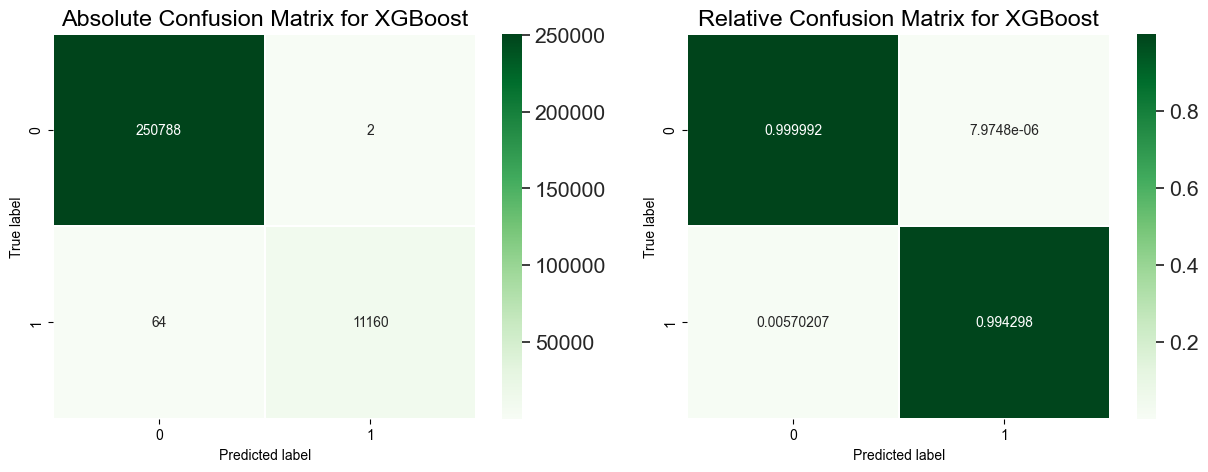

In [17]:
model = XGBoost_classification_tunned(best_hyperparams)

In [18]:
best_model = model

# Evaluation of model

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.97 & 99.95 & 99.39 & 99.67 \\
\hline



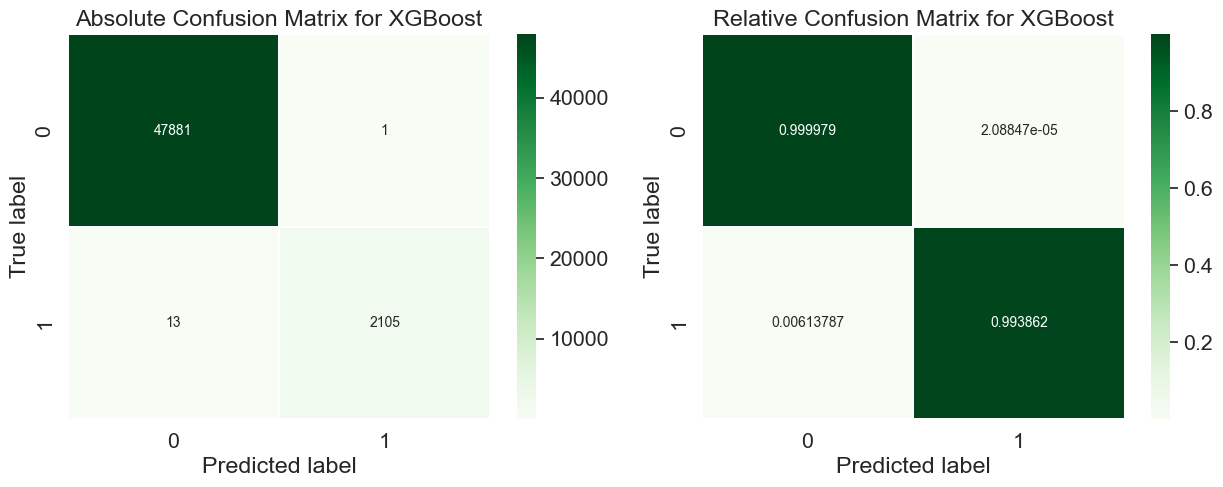

In [19]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels


y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [20]:
import csv

problem = "HTTPS_Brute_Force"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([problem, "-", accuracy, precision, recall, F1, 0, 0, 0])

# Feature importance

## Feature selection

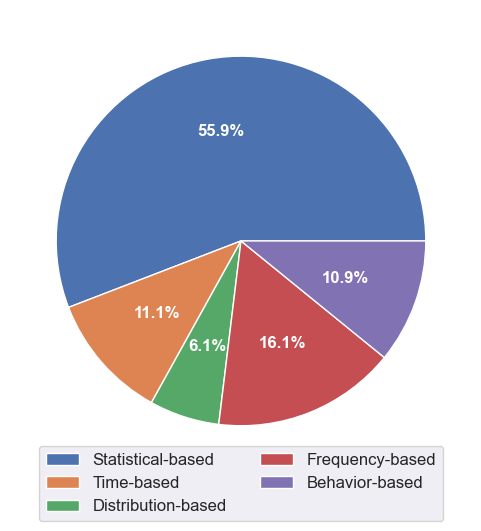

In [21]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [22]:
data

[0.5229471, 0.10387763, 0.057390332, 0.15032996, 0.101740375]

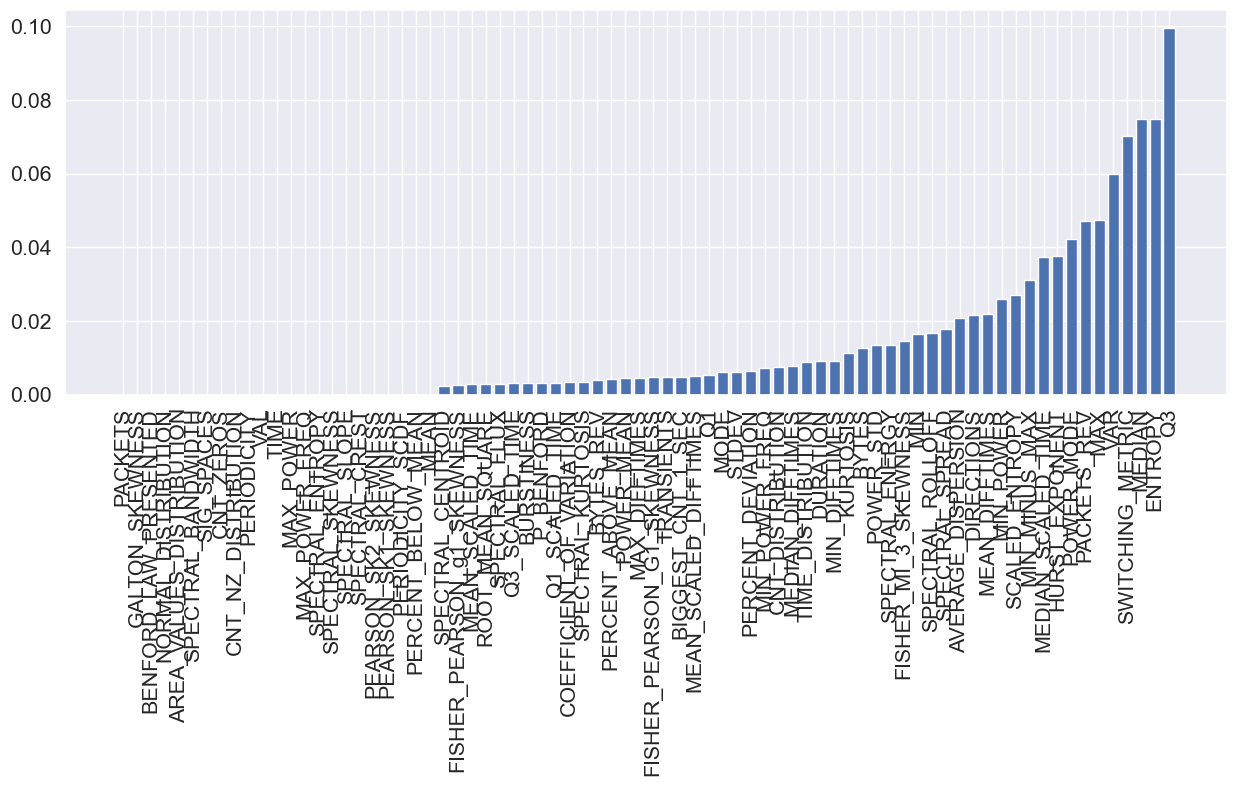

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [24]:
feat_importances.to_dict()

{'PACKETS': 0.0,
 'GALTON_SKEWNESS': 0.0,
 'BENFORD_LAW_PRESENTED': 0.0,
 'NORMAL_DISTRIBUTION': 0.0,
 'AREA_VALUES_DISTRIBUTION': 0.0,
 'SPECTRAL_BANDWIDTH': 0.0,
 'SIG_SPACES': 0.0,
 'CNT_ZEROS': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0,
 'PERIODICITY': 0.0,
 'VAL': 0.0,
 'TIME': 0.0,
 'MAX_POWER': 0.0,
 'MAX_POWER_FREQ': 0.0,
 'SPECTRAL_ENTROPY': 0.0,
 'SPECTRAL_SKEWNESS': 0.0,
 'SPECTRAL_SLOPE': 0.0,
 'SPECTRAL_CREST': 0.0,
 'PEARSON_SK2_SKEWNESS': 0.0,
 'PEARSON_SK1_SKEWNESS': 0.0,
 'PERIODICITY_SCDF': 0.0,
 'PERCENT_BELOW_MEAN': 0.0,
 'MEAN': 0.0,
 'SPECTRAL_CENTROID': 0.002270329277962446,
 'FISHER_PEARSON_g1_SKEWNESS': 0.0026438329368829727,
 'MEAN_SCALED_TIME': 0.002808178775012493,
 'ROOT_MEAN_SQUARE': 0.002887215232476592,
 'SPECTRAL_FLUX': 0.0029458715580403805,
 'Q3_SCALED_TIME': 0.0030398506205528975,
 'BURSTINESS': 0.003087590215727687,
 'P_BENFORD': 0.003205921035259962,
 'Q1_SCALED_TIME': 0.0032257880084216595,
 'COEFFICIENT_OF_VARIATION': 0.0033141670282930136,
 'SPECTRAL_KUR

## Feature corelation

In [25]:
def perform_val(selected_features, best_hyperparams=None, cycles=10):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), selected_features, verbose=False)
    
    X=df_features[selected_features]  # Features
    y=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test   
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
        )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if F1 > best:   
            best = F1
            best_model = model
            
    
    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
    precision = precision_score(y_validation, y_pred)  * 100
    recall = recall_score(y_validation, y_pred)  * 100
    F1 = f1_score(y_validation, y_pred)  * 100
    
    return accuracy,precision,recall,F1

In [26]:
import FEATURE_REDUCTED as FR
REPORTS = []

report = perform_val(FR.without_flow_header(FR.botnet_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.doh_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.dos_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.dns_malware_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.tor_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.vpn_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.all_best_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.combo_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.combo_2_features))
REPORTS.append(report)
report = perform_val(FR.without_flow_header(FR.crypto_features))
REPORTS.append(report)

100%|██████████| 100/100 [03:54<00:00,  2.34s/trial, best loss: -0.9723002810116419]
The best hyperparameters are :  

{'colsample_bytree': 0.15339674691900862, 'gamma': 6.025987865470435, 'max_depth': 10.0, 'min_child_weight': 2.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.3042168610697139}
100%|██████████| 100/100 [02:48<00:00,  1.69s/trial, best loss: -0.9937791601866253]
The best hyperparameters are :  

{'colsample_bytree': 0.021947585670282294, 'gamma': 1.4410254342402191, 'max_depth': 28.0, 'min_child_weight': 0.0, 'n_estimators': 280.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7298384376129919}
100%|██████████| 100/100 [02:35<00:00,  1.55s/trial, best loss: -0.98272398553636] 
The best hyperparameters are :  

{'colsample_bytree': 0.42792204467597333, 'gamma': 4.180700428371697, 'max_depth': 26.0, 'min_child_weight': 5.0, 'n_estimators': 260.0, 'reg_alpha': 6.0, 'reg_lambda': 0.9018022927855124}
100%|██████████| 100/100 [02:57<00:00,  1.78s/trial, best loss: -0.96938369

In [27]:
import csv

problem = "HTTPS_Brute_Force"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        writer.writerow([problem, f_set, report[0], report[1], report[2], report[3], 0, 0, 0])